In [42]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [43]:
data = pd.read_csv('C:/Users/Anirban/Documents/python_programs/python trade/sp500.csv')
data[0:1]

,Close_price
0,1455.219971


In [44]:
X_train = np.arange(0,(len(data)*2)//3)
y_train = np.array(data['Close_price'][:(len(data)*2)//3])
X_test = np.arange((len(data)*2)//3,len(data))
y_test = np.array(data['Close_price'][(len(data)*2)//3:])

In [45]:
y = y_train[0]
y_train /= y
y_test /= y

In [46]:
X_train.reshape(-1,1).shape

(2780, 1)

In [47]:
#Step 2 Build Model
model = Sequential()

model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [48]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2641 samples, validate on 139 samples
Epoch 1/1
2641/2641 [==============================] - 0s 128us/step - loss: 0.2305 - val_loss: 0.4741


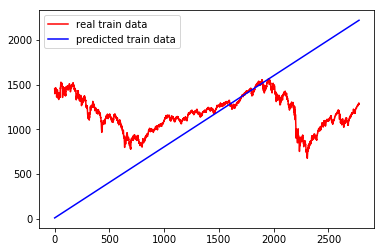

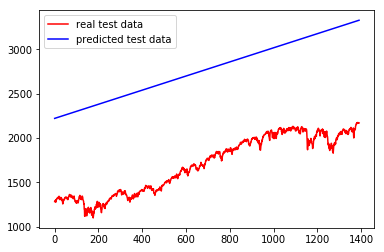

In [65]:
fig, ax = plt.subplots()
ax.plot(y_train*y, color='r',label='real train data')
ax.plot(model.predict(X_train)*y,color='b',label='predicted train data')
leg = ax.legend()
fig, ax = plt.subplots()
ax.plot(y_test*y,color='r',label='real test data')
ax.plot(model.predict(X_test)*y,color='b',label='predicted test data')
leg = ax.legend()
